In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_path = 'E:/ML-01/train'
val_path = 'E:/ML-01/val'
test_path = 'E:/ML-01/test'


train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(val_path,
                                                       target_size=(64, 64),
                                                       batch_size=32,
                                                       class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(64, 64),
                                                  batch_size=32,
                                                  class_mode='binary')

print("Number of training samples:", len(train_generator))
print("Number of validation samples:", len(validation_generator))
print("Number of test samples:", len(test_generator))
print("Class indices:", train_generator.class_indices)



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Number of training samples: 163
Number of validation samples: 1
Number of test samples: 20
Class indices: {'NORMAL': 0, 'PNEUMONIA': 1}


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [3]:
model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10


163/163 [==============================] - 72s 433ms/step - loss: 0.3401 - accuracy: 0.8522 - val_loss: 0.4035 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 65s 399ms/step - loss: 0.2152 - accuracy: 0.9151 - val_loss: 0.3094 - val_accuracy: 0.8750
Epoch 3/10
163/163 [==============================] - 72s 442ms/step - loss: 0.1906 - accuracy: 0.9250 - val_loss: 0.3979 - val_accuracy: 0.6875
Epoch 4/10
163/163 [==============================] - 60s 369ms/step - loss: 0.1708 - accuracy: 0.9308 - val_loss: 0.2894 - val_accuracy: 0.8750
Epoch 5/10
163/163 [==============================] - 52s 320ms/step - loss: 0.1695 - accuracy: 0.9344 - val_loss: 0.4462 - val_accuracy: 0.6875
Epoch 6/10
163/163 [==============================] - 61s 371ms/step - loss: 0.1533 - accuracy: 0.9425 - val_loss: 0.2880 - val_accuracy: 0.9375
Epoch 7/10
163/163 [==============================] - 51s 314ms/step - loss: 0.1530 - accuracy: 0.9438 - val_loss: 0.3916 - val_

In [4]:
test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(64, 64),
                                                  batch_size=32,
                                                  class_mode='binary')

evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1]*100:.2f}%")


Found 624 images belonging to 2 classes.
20/20 [==============================] - 6s 323ms/step - loss: 0.2804 - accuracy: 0.9006
Test Accuracy: 90.06%


In [5]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(test_generator)
y_pred = (predictions > 0.5).astype(int)

print("Classification Report:")
print(classification_report(test_generator.classes, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(test_generator.classes, y_pred))

20/20 [==============================] - 6s 276ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.35      0.38       234
           1       0.64      0.69      0.67       390

    accuracy                           0.56       624
   macro avg       0.52      0.52      0.52       624
weighted avg       0.55      0.56      0.56       624

Confusion Matrix:
[[ 82 152]
 [120 270]]


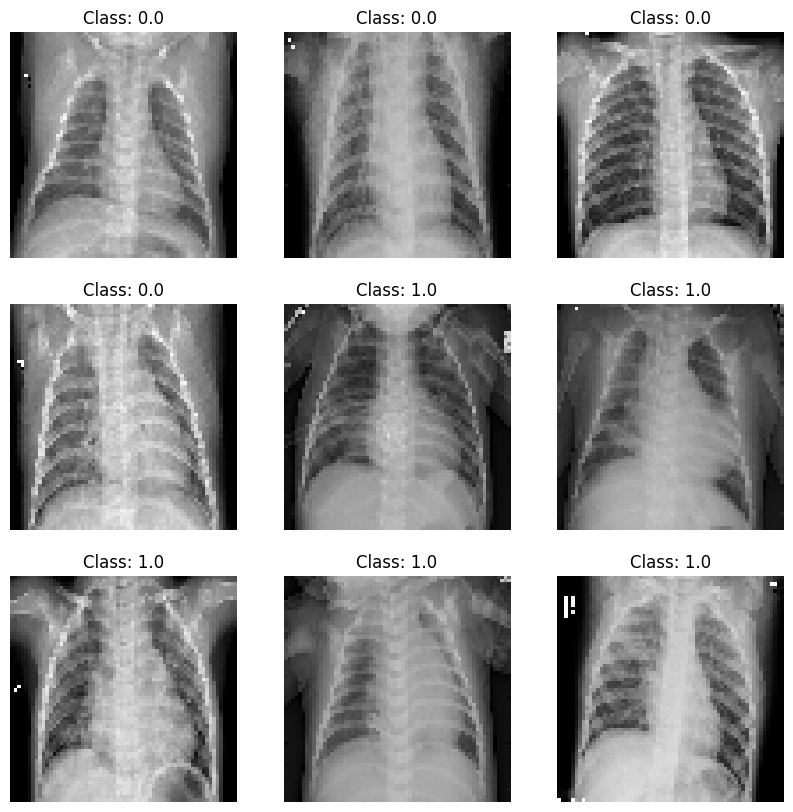

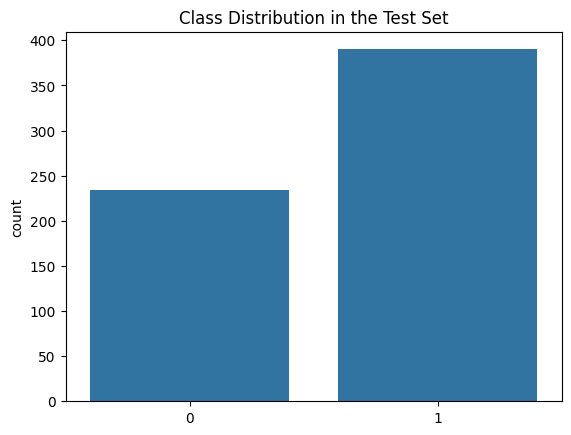

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sample_images, sample_labels = next(test_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"Class: {sample_labels[i]}")
    plt.axis("off")
plt.show()

sns.countplot(x=test_generator.classes)
plt.title('Class Distribution in the Test Set')
plt.show()